In [1]:
import pandas as pd, matplotlib.pyplot as plt
from randan.descriptive_statistics import ScaleStatistics, NominalStatistics

In [2]:
df=pd.read_excel('FL_Конкурсы_20231112.xlsx', index_col=0)
df

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание,URL заказчика,Разделы,...,Телефон подтвержден,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-
https://www.fl.ru/projects/5233285/,False,False,True,Изготовить дизайн одежды для спорт клуба,rotshelda,07.10.2023,35000,Техническое задание для дизайнеров на создание...,https://www.fl.ru/users/rotshelda,Дизайн и Арт,...,True,True,False,False,3,10,4799.75,0,2,0
https://www.fl.ru/projects/5249195/,False,False,False,Создание логотипа в векторе для музыкального п...,Кирилл Бессалаев,12.11.2023,5000,Необходимо создать логотип музыкального продак...,https://www.fl.ru/users/bessalaevkv44,Дизайн и Арт/Логотипы,...,False,True,False,False,0,0,183.33,0,0,0
https://www.fl.ru/projects/5248932/,False,True,False,Дизайн логотипа,mrmazoff,11.11.2023,5000,Необходимо создать логотип компании «А2 Систем...,https://www.fl.ru/users/mrmazoff,Дизайн и Арт/Логотипы,...,False,False,False,False,0,0,204.00,0,0,0
https://www.fl.ru/projects/5248597/,False,False,False,Дизайнер. Создание логотипа для завода ЖБК,Александр Терно,10.11.2023,10000,Приветствую. Нужно создать логотип для завода...,https://www.fl.ru/users/menejt46,Дизайн и Арт/Логотипы,...,False,False,False,False,0,0,184.33,0,0,0
https://www.fl.ru/projects/5248556/,False,False,False,Этикетка краски,irinavarsharo23,10.11.2023,6000,Предложить визуальную концепцию краски для меб...,https://www.fl.ru/users/irinavarsharo23,Дизайн и Арт/Дизайн упаковки,...,False,True,False,False,0,0,183.33,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.fl.ru/projects/5223294/,False,False,False,"Логотип компании ""ПЕРЕМЕНА"". Выпускные альбомы",Сергей Королев,16.09.2023,10000,Название на русском языке. Перемена Целевая...,https://www.fl.ru/users/Korse32,Дизайн и Арт/Логотипы,...,True,True,False,False,9,2,1605.99,0,15,0
https://www.fl.ru/projects/5222724/,False,False,False,Дизайн подарочного сертификата,Евгений П,14.09.2023,7000,Добрый день! Для Федеральной сети клиник лазе...,https://www.fl.ru/users/dop,Дизайн и Арт/Полиграфический дизайн,...,True,True,True,False,17,2,5827.99,0,22,0
https://www.fl.ru/projects/5221875/,False,False,False,Конкурс на разработку логотипа,Dantex Group,13.09.2023,25000,Конкурс на разработку логотипа для новой компа...,https://www.fl.ru/users/reklama17,Дизайн и Арт/Логотипы,...,True,True,False,False,4,11,1189.66,0,1,0
https://www.fl.ru/projects/5221750/,False,False,False,Reels-мейкер в ИнвестФонд Бридж,marketing6175,12.09.2023,5000,Мы ищем крутого reels-мейкера в инвестиционный...,https://www.fl.ru/users/marketing6175,Реклама и Маркетинг/SMM (маркетинг в соцсетях),...,False,True,False,False,0,7,191.33,0,0,0


In [3]:
# номинальная недихотомическая 
df['Разделы']

# номинальная дихотомическая 
df['Email подтвержден']

# интервальные 
df['Бюджет']
df['Кандидаты']

https://www.fl.ru/projects/5233285/    0
https://www.fl.ru/projects/5249195/    0
https://www.fl.ru/projects/5248932/    1
https://www.fl.ru/projects/5248597/    0
https://www.fl.ru/projects/5248556/    0
                                      ..
https://www.fl.ru/projects/5223294/    4
https://www.fl.ru/projects/5222724/    0
https://www.fl.ru/projects/5221875/    0
https://www.fl.ru/projects/5221750/    0
https://www.fl.ru/projects/5221719/    0
Name: Кандидаты, Length: 116, dtype: int64

In [4]:
df['Email подтвержден'] = df['Email подтвержден'].replace(0, 'False')
df['Email подтвержден'] = df['Email подтвержден'].replace(1, 'True')

In [5]:
ss = ScaleStatistics(df, ['Кандидаты'], normality_test=True)


SCALE STATISTICS SUMMARY
------------------



,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
Кандидаты,116.000,0.000,0.000,0.767,0.000,0.000,0.000,0.000,0.000,10.000,10.000,1.834,3.363,0.433,0.458



NORMALITY TESTS
------------------



,statistic,p-value
Кандидаты,0.421,0.000


In [6]:
# достаточно большое стандартное отклонение
# можно уверенно заявить об однородности, так как interquartile range равен 0
# 25% конкурсов обладает количеством участников 0
# 75% конкурсов обладает количеством участников 0 и более
# репрезентирующему значению можно доверять, так как неоднородность нулевая

print (f"Чаще всего в конкурсах сайта FL.ru кандидатами становятся {ss. summary()['mode']['Кандидаты']} человек")

Чаще всего в конкурсах сайта FL.ru кандидатами становятся 0.0 человек


In [7]:
print (f"50% конкурсов сайта FI.ru имеет {ss.summary ()['median']['Кандидаты']} кандидатов")

50% конкурсов сайта FI.ru имеет 0.0 кандидатов


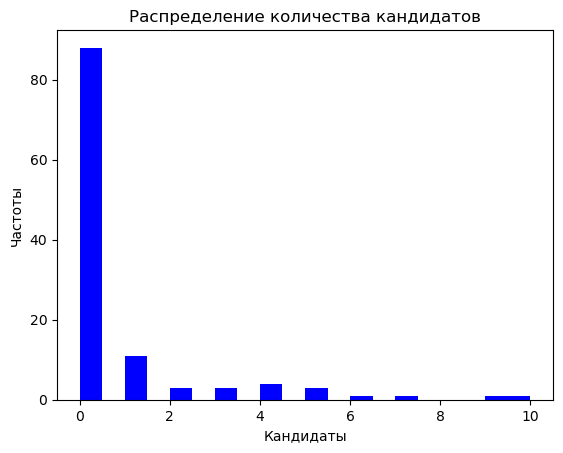

In [8]:
plt.hist(df['Кандидаты'].dropna(), bins=20, color='blue')
plt.title('Распределение количества кандидатов')
plt.xlabel('Кандидаты')
plt.ylabel('Частоты');

# Распределение однородно и ненормально, есть смещение значений в сторону меньшего количества кандидатов

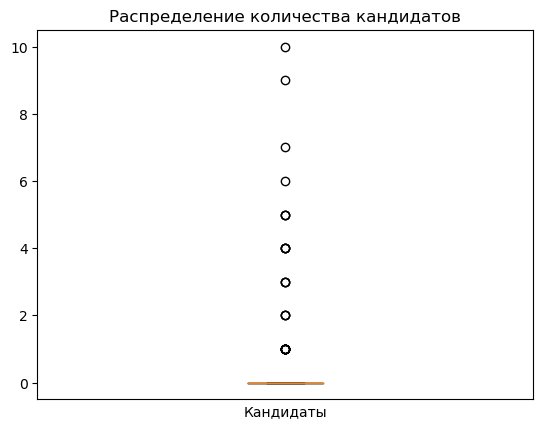

In [9]:
plt.boxplot(df['Кандидаты'].dropna())
plt.title('Распределение количества кандидатов') 
plt.xticks([])
plt.xlabel('Кандидаты');

# График показывает, что у нас много выбросов

In [10]:
# Репрезентирующий нашу базу данных конкурс по переменной "Кандидаты"
df_candidates = df["Кандидаты"] == ss.summary()['median']['Кандидаты']
df[df_candidates]

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание,URL заказчика,Разделы,...,Телефон подтвержден,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-
https://www.fl.ru/projects/5233285/,False,False,True,Изготовить дизайн одежды для спорт клуба,rotshelda,07.10.2023,35000,Техническое задание для дизайнеров на создание...,https://www.fl.ru/users/rotshelda,Дизайн и Арт,...,True,True,False,False,3,10,4799.75,0,2,0
https://www.fl.ru/projects/5249195/,False,False,False,Создание логотипа в векторе для музыкального п...,Кирилл Бессалаев,12.11.2023,5000,Необходимо создать логотип музыкального продак...,https://www.fl.ru/users/bessalaevkv44,Дизайн и Арт/Логотипы,...,False,True,False,False,0,0,183.33,0,0,0
https://www.fl.ru/projects/5248597/,False,False,False,Дизайнер. Создание логотипа для завода ЖБК,Александр Терно,10.11.2023,10000,Приветствую. Нужно создать логотип для завода...,https://www.fl.ru/users/menejt46,Дизайн и Арт/Логотипы,...,False,False,False,False,0,0,184.33,0,0,0
https://www.fl.ru/projects/5248556/,False,False,False,Этикетка краски,irinavarsharo23,10.11.2023,6000,Предложить визуальную концепцию краски для меб...,https://www.fl.ru/users/irinavarsharo23,Дизайн и Арт/Дизайн упаковки,...,False,True,False,False,0,0,183.33,0,0,0
https://www.fl.ru/projects/5247398/,False,False,False,"создать макет футболки, свитшота, толстовки с ...",alenaruzanovand,08.11.2023,5000,Необходимо создать по 2-3 штуки макет футбол...,https://www.fl.ru/users/alenaruzanovand,Дизайн и Арт/Полиграфический дизайн,...,False,True,False,False,0,0,189.33,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.fl.ru/projects/5223551/,False,False,False,Логотип,ski_nsk1,17.09.2023,5000,Нужен логотип для бренда биатлонной экипировки...,https://www.fl.ru/users/ski_nsk1,Дизайн и Арт,...,True,True,True,False,4,2,1153.87,0,3,0
https://www.fl.ru/projects/5222724/,False,False,False,Дизайн подарочного сертификата,Евгений П,14.09.2023,7000,Добрый день! Для Федеральной сети клиник лазе...,https://www.fl.ru/users/dop,Дизайн и Арт/Полиграфический дизайн,...,True,True,True,False,17,2,5827.99,0,22,0
https://www.fl.ru/projects/5221875/,False,False,False,Конкурс на разработку логотипа,Dantex Group,13.09.2023,25000,Конкурс на разработку логотипа для новой компа...,https://www.fl.ru/users/reklama17,Дизайн и Арт/Логотипы,...,True,True,False,False,4,11,1189.66,0,1,0
https://www.fl.ru/projects/5221750/,False,False,False,Reels-мейкер в ИнвестФонд Бридж,marketing6175,12.09.2023,5000,Мы ищем крутого reels-мейкера в инвестиционный...,https://www.fl.ru/users/marketing6175,Реклама и Маркетинг/SMM (маркетинг в соцсетях),...,False,True,False,False,0,7,191.33,0,0,0


In [11]:
bss = ScaleStatistics(df, ['Бюджет'], normality_test=True)


SCALE STATISTICS SUMMARY
------------------



,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
Бюджет,116.000,5000.000,10000.000,21209.284,5000.000,15000.000,10000.000,0.013,5000.000,777777.000,772777.000,73334.973,5378018234.171,0.684,0.821



NORMALITY TESTS
------------------



,statistic,p-value
Бюджет,0.413,0.000


In [12]:
# средний бюджет заказа - 21 тыс. руб.
# достаточно большое стандартное отклонение, более чем в 3 раза превышающее среднее значение
# наблюдается однородость, так как interquartile range близок к 0
# 25% конкурсов обладает бюджетом участников 5000 и менее
# 75% конкурсов обладает бюджетом участников 15000 и более
# репрезентирующему значению можно доверять, так как неоднородность нулевая

print (f"Чаще всего в конкурсах сайта FL.ru бюджет составляет {bss.summary()['mode']['Бюджет']} рублей")

Чаще всего в конкурсах сайта FL.ru бюджет составляет 5000.0 рублей


In [13]:
print (f"50% конкурсов сайта FI.ru имеет бюджет {bss.summary()['median']['Бюджет']} рублей и меньше")

50% конкурсов сайта FI.ru имеет бюджет 10000.0 рублей и меньше


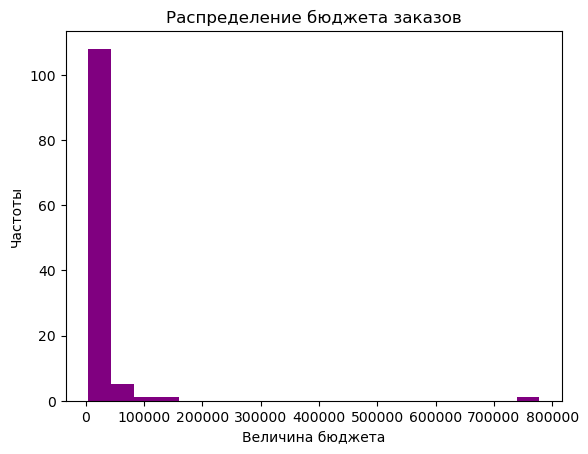

In [14]:
plt.hist(df['Бюджет'].dropna(), bins=20, color='purple')
plt.title('Распределение бюджета заказов') 
plt.xlabel('Величина бюджета') 
plt.ylabel('Частоты');

# Распределение ненормально, есть смещение значений в сторону меньших бюджетов (до 50 тыс.)
# Есть явный выброс в интервале от 700 до 800 тыс.

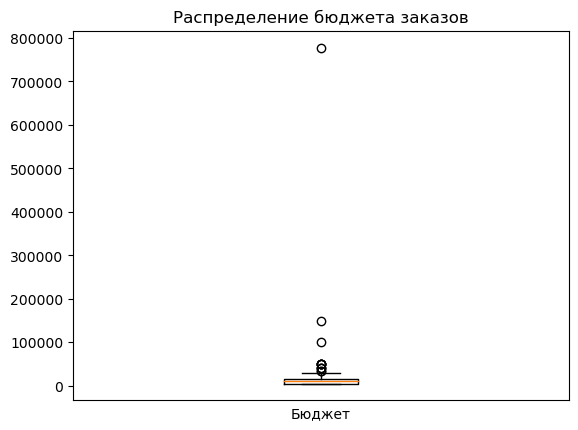

In [15]:
plt.boxplot(df['Бюджет'].dropna())
plt.title('Распределение бюджета заказов') 
plt.xticks([])
plt.xlabel('Бюджет');

# Можем наблюдать не только выброс в интервале от 700 до 800 тыс., но и многие другие, располагающиеся ближе к среднему значению

In [16]:
# Репрезентирующий нашу базу данных конкурс по переменной "Бюджет"
df_budget = df["Бюджет"] == bss.summary()['median']['Бюджет']
df[df_budget]

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание,URL заказчика,Разделы,...,Телефон подтвержден,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-
https://www.fl.ru/projects/5248597/,False,False,False,Дизайнер. Создание логотипа для завода ЖБК,Александр Терно,10.11.2023,10000,Приветствую. Нужно создать логотип для завода...,https://www.fl.ru/users/menejt46,Дизайн и Арт/Логотипы,...,False,False,False,False,0,0,184.33,0,0,0
https://www.fl.ru/projects/5246886/,False,False,False,Необходимо сделать дизайн фирменного календаря...,krasnov47,07.11.2023,10000,Необходимо сделать дизайн фирменного календаря...,https://www.fl.ru/users/krasnov47,Полиграфия/Полиграфический дизайн,...,False,True,False,False,0,0,187.33,0,0,0
https://www.fl.ru/projects/5245486/,False,False,False,Необходимо сделать логотип,justbenikki,03.11.2023,10000,Компания занимается консалтингом в производств...,https://www.fl.ru/users/justbenikki,Дизайн и Арт,...,True,True,False,False,7,5,504.30,0,3,0
https://www.fl.ru/projects/5243329/,False,False,False,NEW бренд России. Разработка дизайна банки ж/б...,zakaz-drpeppe85,30.10.2023,10000,Требуется разработка/переработка дизайна банки...,https://www.fl.ru/users/zakaz-drpeppe85,Дизайн и Арт,...,True,True,False,True,2,6,2155.36,0,3,0
https://www.fl.ru/projects/5242492/,False,False,False,Придумать название для пончиковой,fl4pon,27.10.2023,10000,"Здравствуйте, уважаемые участники! Прошу вас п...",https://www.fl.ru/users/fl4pon,Тексты/Слоганы/Нейминг,...,False,True,False,False,0,3,191.33,0,0,0
https://www.fl.ru/projects/5241802/,False,True,False,"дизайнер indoor или наружной рекламы, нужно до...",yaaho,26.10.2023,10000,"Нужно сделать вызывающий макет, он будет висет...",https://www.fl.ru/users/yaaho,Дизайн и Арт,...,True,True,False,False,7,1,393.07,0,4,0
https://www.fl.ru/projects/5239884/,False,False,False,Разработка дизайна оформления окон в кафе,odintsovd,22.10.2023,10000,Всем привет! Необходимо разработать оформлени...,https://www.fl.ru/users/odintsovd,Дизайн и Арт,...,True,True,False,False,6,11,218.33,0,0,0
https://www.fl.ru/projects/5239842/,False,False,False,Логотип для строительной компании,vervilyola38,22.10.2023,10000,"Архитектурно-строительное бюро ""ВиВиХом"" или ""...",https://www.fl.ru/users/vervilyola38,Дизайн и Арт/Логотипы,...,True,True,False,False,0,0,193.33,0,1,0
https://www.fl.ru/projects/5238166/,False,False,False,Дизайн значков и автобусов городского обществе...,Ульяна Дудникова,18.10.2023,10000,Разработка дизайна металлических значков на од...,https://www.fl.ru/users/pu-200632,Дизайн и Арт,...,True,True,False,False,2,11,199.33,0,0,0
https://www.fl.ru/projects/5238042/,False,False,False,Логотип для компании,Александр Царев,18.10.2023,10000,Название компании – Стиль-Групп (Style-Group) ...,https://www.fl.ru/users/apaimullin,Дизайн и Арт/Логотипы,...,True,True,False,False,11,10,2010.66,0,47,2


In [17]:
ens = NominalStatistics(df, ['Email подтвержден'])


NOMINAL STATISTICS SUMMARY
------------------



,N,mode,entropy coef.,quality var.
Email подтвержден,116,True,0.294,0.196



FREQUENCIES
------------------

variable: Email подтвержден


,N,%
True,110,94.828
False,6,5.172


In [18]:
# Наблюдаем значительное смещение значений в сторону подтверждённого email
# Есть небольшая неоднородность, так как 0 < entropy coef < 0.5
# Чаще всего в конкурсах сайта FL.ru email подтвержден 
# Репрезентирующему значению можно доверять, так как неоднородность небольшая

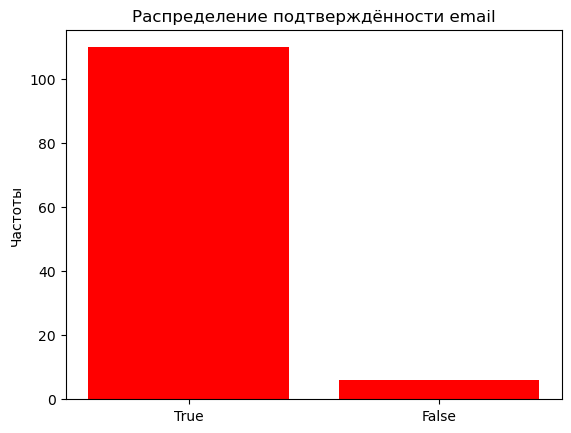

In [19]:
freq_table = ens.frequencies()['Email подтвержден']
plt.bar(['True', 'False'], freq_table['N'], color='red')
plt.title('Распределение подтверждённости email') 
plt.ylabel('Частоты');

In [20]:
print(f"Энтропийный коэффициент вариации равен {round(ens.summary()['entropy coef.']['Email подтвержден'],3)}")
print(f"Коэффициент качественной вариации равен {round(ens.summary()['quality var.']['Email подтвержден'],3)}")

Энтропийный коэффициент вариации равен 0.294
Коэффициент качественной вариации равен 0.196


In [21]:
# Репрезентирующий нашу базу данных конкурс по переменной "Email подтвержден"
df_email = df["Email подтвержден"] == ens.summary()['mode']['Email подтвержден']
df[df_email]

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание,URL заказчика,Разделы,...,Телефон подтвержден,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-
https://www.fl.ru/projects/5233285/,False,False,True,Изготовить дизайн одежды для спорт клуба,rotshelda,07.10.2023,35000,Техническое задание для дизайнеров на создание...,https://www.fl.ru/users/rotshelda,Дизайн и Арт,...,True,True,False,False,3,10,4799.75,0,2,0
https://www.fl.ru/projects/5249195/,False,False,False,Создание логотипа в векторе для музыкального п...,Кирилл Бессалаев,12.11.2023,5000,Необходимо создать логотип музыкального продак...,https://www.fl.ru/users/bessalaevkv44,Дизайн и Арт/Логотипы,...,False,True,False,False,0,0,183.33,0,0,0
https://www.fl.ru/projects/5248556/,False,False,False,Этикетка краски,irinavarsharo23,10.11.2023,6000,Предложить визуальную концепцию краски для меб...,https://www.fl.ru/users/irinavarsharo23,Дизайн и Арт/Дизайн упаковки,...,False,True,False,False,0,0,183.33,0,0,0
https://www.fl.ru/projects/5247398/,False,False,False,"создать макет футболки, свитшота, толстовки с ...",alenaruzanovand,08.11.2023,5000,Необходимо создать по 2-3 штуки макет футбол...,https://www.fl.ru/users/alenaruzanovand,Дизайн и Арт/Полиграфический дизайн,...,False,True,False,False,0,0,189.33,0,0,0
https://www.fl.ru/projects/5247638/,False,False,False,Ищем дизайнера/художника для создания логотипа.,maestrostrange,08.11.2023,5000,"Здравствуйте! Мы команда ""Optimal Engineering...",https://www.fl.ru/users/maestrostrange,Дизайн и Арт/Логотипы,...,False,True,False,False,0,0,186.33,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.fl.ru/projects/5223294/,False,False,False,"Логотип компании ""ПЕРЕМЕНА"". Выпускные альбомы",Сергей Королев,16.09.2023,10000,Название на русском языке. Перемена Целевая...,https://www.fl.ru/users/Korse32,Дизайн и Арт/Логотипы,...,True,True,False,False,9,2,1605.99,0,15,0
https://www.fl.ru/projects/5222724/,False,False,False,Дизайн подарочного сертификата,Евгений П,14.09.2023,7000,Добрый день! Для Федеральной сети клиник лазе...,https://www.fl.ru/users/dop,Дизайн и Арт/Полиграфический дизайн,...,True,True,True,False,17,2,5827.99,0,22,0
https://www.fl.ru/projects/5221875/,False,False,False,Конкурс на разработку логотипа,Dantex Group,13.09.2023,25000,Конкурс на разработку логотипа для новой компа...,https://www.fl.ru/users/reklama17,Дизайн и Арт/Логотипы,...,True,True,False,False,4,11,1189.66,0,1,0
https://www.fl.ru/projects/5221750/,False,False,False,Reels-мейкер в ИнвестФонд Бридж,marketing6175,12.09.2023,5000,Мы ищем крутого reels-мейкера в инвестиционный...,https://www.fl.ru/users/marketing6175,Реклама и Маркетинг/SMM (маркетинг в соцсетях),...,False,True,False,False,0,7,191.33,0,0,0


In [22]:
sens = NominalStatistics(df, ['Разделы'])


NOMINAL STATISTICS SUMMARY
------------------



,N,mode,entropy coef.,quality var.
Разделы,116,Дизайн и Арт/Логотипы,0.748,0.883



FREQUENCIES
------------------

variable: Разделы


,N,%
Дизайн и Арт/Логотипы,36,31.034
Дизайн и Арт,21,18.103
Тексты/Слоганы/Нейминг,9,7.759
Дизайн и Арт/Дизайн упаковки,6,5.172
Дизайн и Арт/Полиграфический дизайн,4,3.448
Дизайн и Арт/Фирменный стиль,4,3.448
Дизайн и Арт/Рисунки и иллюстрации,4,3.448
Разработка сайтов/Дизайн сайтов,3,2.586
Дизайн и Арт/Дизайн сайтов,3,2.586
Дизайн и Арт/Инфографика,2,1.724


In [23]:
# Наблюдаем смещение значений в сторону блока логотипов и "дизайн и арт"
# Довольно большая неоднородность, так как entropy coef > 0.5
# Самый популярный раздел в конкурсах сайта FL.ru "Дизайн и Арт/Логотипы"
# Репрезентирующему значению не очень можно доверять, так как неоднородность достаточно большая

In [24]:
freq_table1 = sens.frequencies()['Разделы']

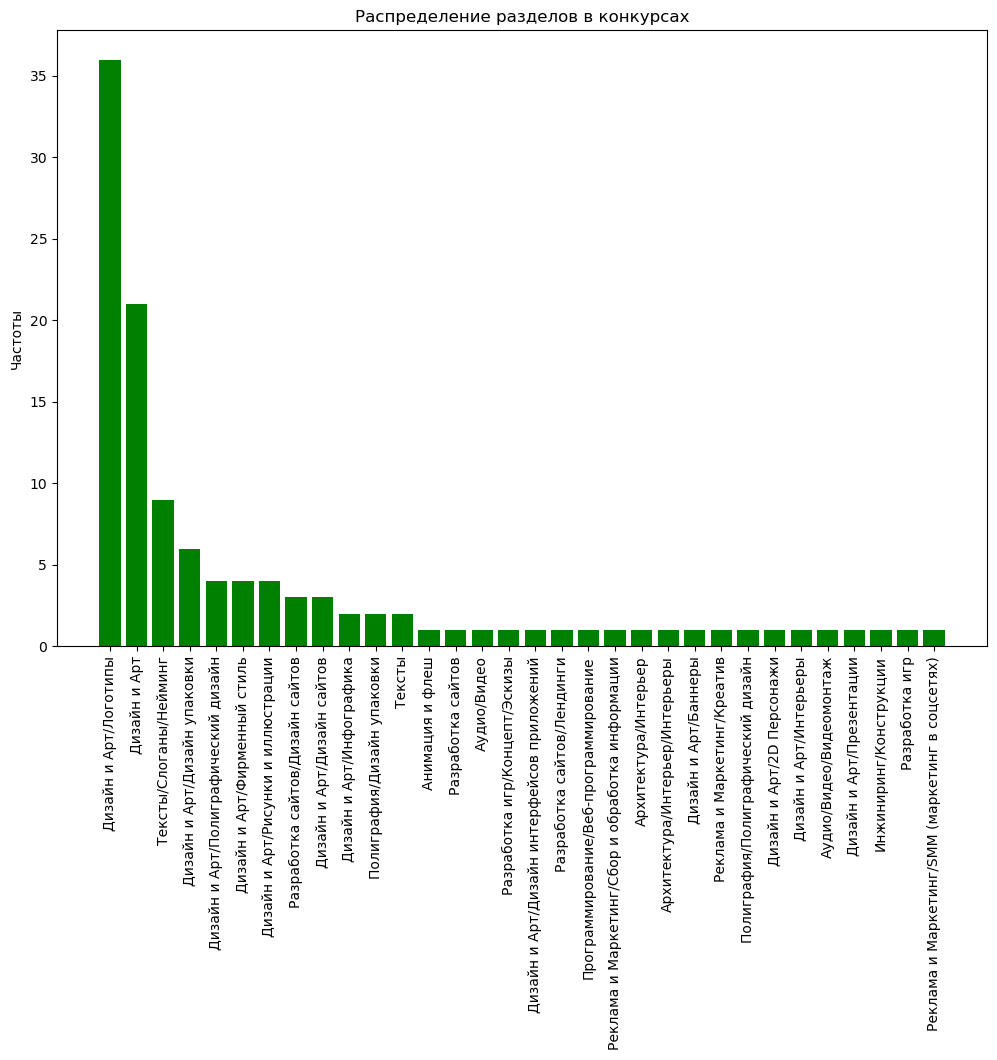

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(freq_table1.index, freq_table1['N'], color='green')
plt.title('Распределение разделов в конкурсах') 
plt.ylabel('Частоты') 
plt.xticks(rotation=90);

In [26]:
print(f"Энтропийный коэффициент вариации равен {round(sens.summary()['entropy coef.']['Разделы'],3)}")
print(f"Коэффициент качественной вариации равен {round(sens.summary()['quality var.']['Разделы'],3)}")

Энтропийный коэффициент вариации равен 0.748
Коэффициент качественной вариации равен 0.883


In [27]:
# Репрезентирующий нашу базу данных конкурс по переменной "Разделы"
df_chapters = df["Разделы"] == sens.summary()['mode']['Разделы']
df[df_chapters]

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание,URL заказчика,Разделы,...,Телефон подтвержден,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-
https://www.fl.ru/projects/5249195/,False,False,False,Создание логотипа в векторе для музыкального п...,Кирилл Бессалаев,12.11.2023,5000,Необходимо создать логотип музыкального продак...,https://www.fl.ru/users/bessalaevkv44,Дизайн и Арт/Логотипы,...,False,True,False,False,0,0,183.33,0,0,0
https://www.fl.ru/projects/5248932/,False,True,False,Дизайн логотипа,mrmazoff,11.11.2023,5000,Необходимо создать логотип компании «А2 Систем...,https://www.fl.ru/users/mrmazoff,Дизайн и Арт/Логотипы,...,False,False,False,False,0,0,204.00,0,0,0
https://www.fl.ru/projects/5248597/,False,False,False,Дизайнер. Создание логотипа для завода ЖБК,Александр Терно,10.11.2023,10000,Приветствую. Нужно создать логотип для завода...,https://www.fl.ru/users/menejt46,Дизайн и Арт/Логотипы,...,False,False,False,False,0,0,184.33,0,0,0
https://www.fl.ru/projects/5248119/,False,False,False,Логотип,bekbolatk0265,09.11.2023,15000,"Компания ""Tolem"" ""Tolem"" с перевода из казахск...",https://www.fl.ru/users/bekbolatk0265,Дизайн и Арт/Логотипы,...,True,False,False,False,0,0,185.33,0,0,0
https://www.fl.ru/projects/5247638/,False,False,False,Ищем дизайнера/художника для создания логотипа.,maestrostrange,08.11.2023,5000,"Здравствуйте! Мы команда ""Optimal Engineering...",https://www.fl.ru/users/maestrostrange,Дизайн и Арт/Логотипы,...,False,True,False,False,0,0,186.33,0,0,0
https://www.fl.ru/projects/5246022/,False,False,False,Создание логотипа кафе,Дмитрий Долгих,04.11.2023,5000,Задача простая – создать логотип заведения Из...,https://www.fl.ru/users/Hippy1987,Дизайн и Арт/Логотипы,...,True,True,False,False,13,0,652.66,0,7,2
https://www.fl.ru/projects/5245882/,False,False,False,Разработка логотипа,Василиса Соболева,04.11.2023,5000,"Всем здравствуйте! Друзья, нам нужна помощь в ...",https://www.fl.ru/users/ak-funny60,Дизайн и Арт/Логотипы,...,True,True,False,False,0,0,193.33,0,0,0
https://www.fl.ru/projects/5245046/,False,False,False,Создать логотип,prosecutor34,02.11.2023,5000,Необходимо отрисовать логотип для тактических ...,https://www.fl.ru/users/prosecutor34,Дизайн и Арт/Логотипы,...,True,False,False,False,0,0,191.33,0,0,0
https://www.fl.ru/projects/5244648/,False,False,False,Дизайнер,lex_75,01.11.2023,5000,Разработать логотип и фирменный стиль для брен...,https://www.fl.ru/users/lex_75,Дизайн и Арт/Логотипы,...,True,True,False,True,6,7,1095.63,0,3,0
https://www.fl.ru/projects/5244412/,False,False,False,Требуется разработать логотип для компании-про...,ryabceva79,01.11.2023,9500,Компания-провайдер занимается распространением...,https://www.fl.ru/users/ryabceva79,Дизайн и Арт/Логотипы,...,False,True,False,False,0,0,193.33,0,0,0


In [28]:
# Конкурс, наиболее репрезентирующий совокупность конкурсов по выбранным переменным
df_final = df[df_candidates & df_budget & df_email & df_chapters]
df_final

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание,URL заказчика,Разделы,...,Телефон подтвержден,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-
https://www.fl.ru/projects/5239842/,False,False,False,Логотип для строительной компании,vervilyola38,22.10.2023,10000,"Архитектурно-строительное бюро ""ВиВиХом"" или ""...",https://www.fl.ru/users/vervilyola38,Дизайн и Арт/Логотипы,...,True,True,False,False,0,0,193.33,0,1,0
https://www.fl.ru/projects/5238042/,False,False,False,Логотип для компании,Александр Царев,18.10.2023,10000,Название компании – Стиль-Групп (Style-Group) ...,https://www.fl.ru/users/apaimullin,Дизайн и Арт/Логотипы,...,True,True,False,False,11,10,2010.66,0,47,2
https://www.fl.ru/projects/5237052/,False,False,False,Логотип для компании по продаже витаминов Вита...,Александр Царев,16.10.2023,10000,ВитаМикс – забота о здоровье. Цвета только ...,https://www.fl.ru/users/apaimullin,Дизайн и Арт/Логотипы,...,True,True,False,False,11,10,2010.66,0,47,2
https://www.fl.ru/projects/5236047/,False,False,False,Дизайн логотипа для компании строительной химии,elyaguseynovass,13.10.2023,10000,Добрый день! Необходим тематический логотип д...,https://www.fl.ru/users/elyaguseynovass,Дизайн и Арт/Логотипы,...,True,True,False,False,0,1,205.33,0,0,0
https://www.fl.ru/projects/5235788/,False,False,False,Разработка логотипа для цветочного салона.,Елена Шабанова,13.10.2023,10000,Добрый день уважаемые участники! Приглашаем в...,https://www.fl.ru/users/483043,Дизайн и Арт/Логотипы,...,True,True,False,False,9,3,638.33,0,1,0
https://www.fl.ru/projects/5235768/,False,False,False,"Дизайн логотипа, визитки для СМИ",travelmorenews,13.10.2023,10000,Необходимо создать уникальный логотип и дизайн...,https://www.fl.ru/users/travelmorenews,Дизайн и Арт/Логотипы,...,True,True,False,False,0,1,189.33,0,0,0
https://www.fl.ru/projects/5235286/,False,False,False,"Создание логотипа ""Оредеж""",mbabicheva62,12.10.2023,10000,Необходимо создать логотип для Инвестиционно с...,https://www.fl.ru/users/mbabicheva62,Дизайн и Арт/Логотипы,...,True,True,False,True,4,7,2295.90,0,1,0
https://www.fl.ru/projects/5230187/,False,False,False,Улучшить векторный логотип англоязычного порта...,Павел Яковлев,01.10.2023,10000,"Уважаемые талантливые дизайнеры и визионеры, ...",https://www.fl.ru/users/Atomic-Energyru,Дизайн и Арт/Логотипы,...,True,True,False,True,11,6,3413.67,0,5,0


In [29]:
# У всех заказчиков конкурсов высокий рейтинг, более половины из них уже давно зарегистрированы на сайте
# Все конкурсы относительно новые
# Бюджет конкурса в два раза больше, чем наиболее часто встречающийся бюджет

In [30]:
# Выбранный конкурс : "https://www.fl.ru/projects/5218684/trebuetsya-razrabotat-logotip-biol-technology-za-konkurs-30000--14500-za-soglasovannyie-dorabotki.html"
# Количество кандидатов 21, что намного больше, чем в репрезентирующих конкурсах
# Бюджет составляет 30000, что намного больше, чем в репрезентирующих конкурсах
# Номинальные переменные совпадают